<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [10]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [11]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [12]:
# A:
seeds.head(1)

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1


In [4]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area               210 non-null float64
perimeter          210 non-null float64
compactness        210 non-null float64
length             210 non-null float64
width              210 non-null float64
asymmetry_coeff    210 non-null float64
groove_length      210 non-null float64
species            210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


### 2. Do some EDA of relationships between features.

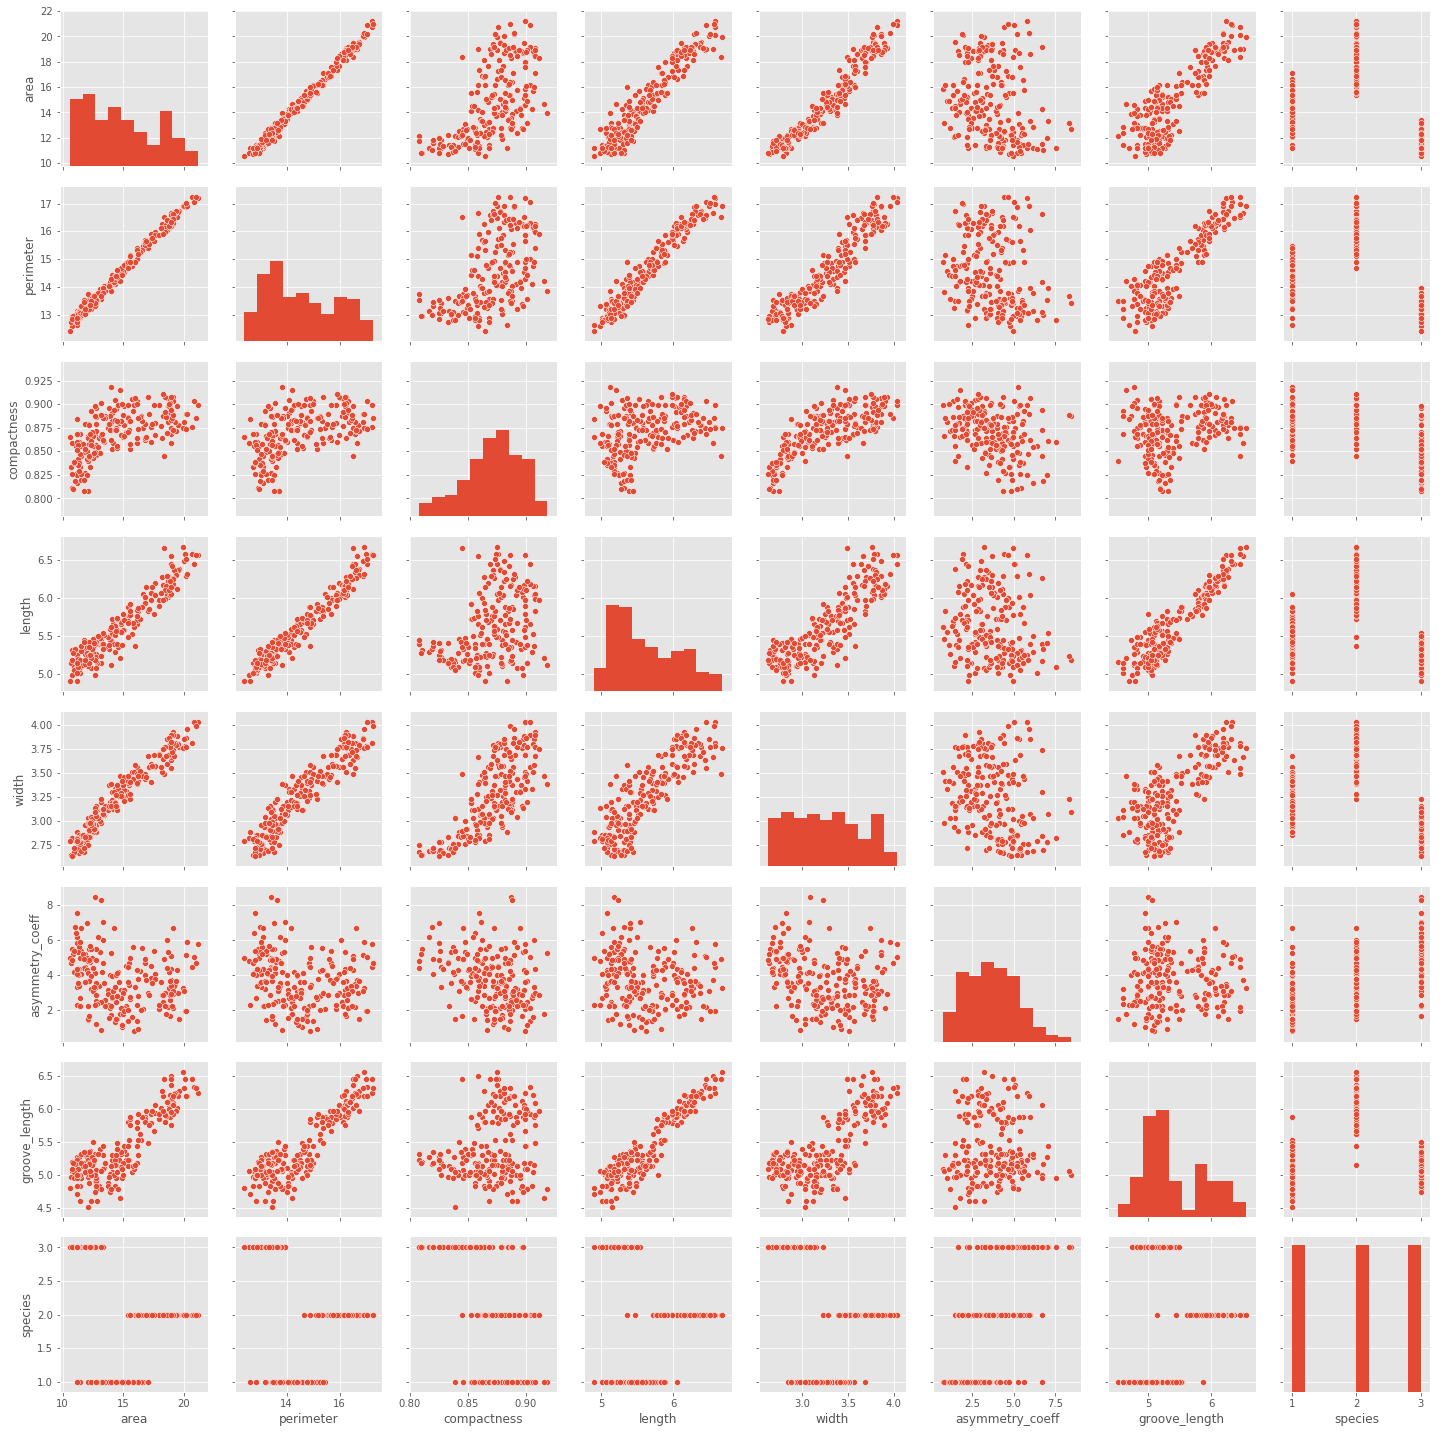

In [5]:
# Plot the Data to see the distributions/relationships
sns.pairplot(seeds)

In [7]:
# Check for nulls
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [3]:
# Look at the real species labels.


Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [17]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = seeds[[i for i in seeds.columns if i != 'species']]
Xs = ss.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters = 8, random_state = 0).fit(Xs)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for out first clustering model.

In [21]:
# A:
predicted = model.labels_
centroids = model.cluster_centers_

print "Predicted clusters to points: ", predicted
print "Location of centroids: "
print centroids

Predicted clusters to points:  [6 6 3 3 3 3 6 3 5 5 5 6 3 6 6 3 3 3 3 1 6 6 3 1 6 6 1 1 6 1 6 6 6 6 6 3 5
 5 6 7 3 6 3 5 3 6 6 3 6 6 6 5 6 6 6 6 3 3 6 1 1 1 1 1 1 3 6 6 6 1 5 5 5 4
 5 5 5 0 0 5 5 0 0 4 4 4 4 0 0 0 4 4 4 0 0 5 0 4 4 4 5 4 0 0 4 4 4 5 0 4 4
 0 4 0 0 4 4 4 4 0 0 4 5 4 3 4 0 4 4 5 4 4 5 5 5 3 5 5 5 5 7 7 7 7 2 2 1 1
 1 2 7 2 2 2 2 2 1 2 2 2 1 1 2 1 7 1 7 1 2 2 2 7 2 2 2 7 2 2 7 1 7 7 7 7 7
 2 2 2 7 7 2 1 1 2 1 7 7 7 1 3 7 3 1 7 1 1 1 7 1 7]
Location of centroids: 
[[ 1.64556535  1.66047756  0.4452605   1.71036309  1.45520743  0.62861421
   1.66067624]
 [-0.91351484 -0.9326448  -0.46027843 -0.89113498 -0.89072321 -0.30450505
  -0.82181332]
 [-1.19621321 -1.08446137 -1.87444978 -0.85268576 -1.44709243  0.83244104
  -0.50741772]
 [-0.12002128 -0.25074116  1.1570542  -0.58687469  0.26216258 -0.70521625
  -0.87634574]
 [ 1.37576173  1.33846846  0.83809979  1.27720883  1.30581757 -0.67644501
   1.33975556]
 [ 0.571446    0.63420397  0.20651071  0.62899916  0.53840009  0.1686345


### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [23]:
from sklearn.metrics import silhouette_score

# A:
print silhouette_score(X, predicted, random_state = 0)

Xs

0.182692663958


In [47]:
predicted

array([6, 6, 3, 3, 3, 3, 6, 3, 5, 5, 5, 6, 3, 6, 6, 3, 3, 3, 3, 1, 6, 6, 3,
       1, 6, 6, 1, 1, 6, 1, 6, 6, 6, 6, 6, 3, 5, 5, 6, 7, 3, 6, 3, 5, 3, 6,
       6, 3, 6, 6, 6, 5, 6, 6, 6, 6, 3, 3, 6, 1, 1, 1, 1, 1, 1, 3, 6, 6, 6,
       1, 5, 5, 5, 4, 5, 5, 5, 0, 0, 5, 5, 0, 0, 4, 4, 4, 4, 0, 0, 0, 4, 4,
       4, 0, 0, 5, 0, 4, 4, 4, 5, 4, 0, 0, 4, 4, 4, 5, 0, 4, 4, 0, 4, 0, 0,
       4, 4, 4, 4, 0, 0, 4, 5, 4, 3, 4, 0, 4, 4, 5, 4, 4, 5, 5, 5, 3, 5, 5,
       5, 5, 7, 7, 7, 7, 2, 2, 1, 1, 1, 2, 7, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 1, 7, 1, 7, 1, 2, 2, 2, 7, 2, 2, 2, 7, 2, 2, 7, 1, 7, 7, 7, 7,
       7, 2, 2, 2, 7, 7, 2, 1, 1, 2, 1, 7, 7, 7, 1, 3, 7, 3, 1, 7, 1, 1, 1,
       7, 1, 7], dtype=int32)

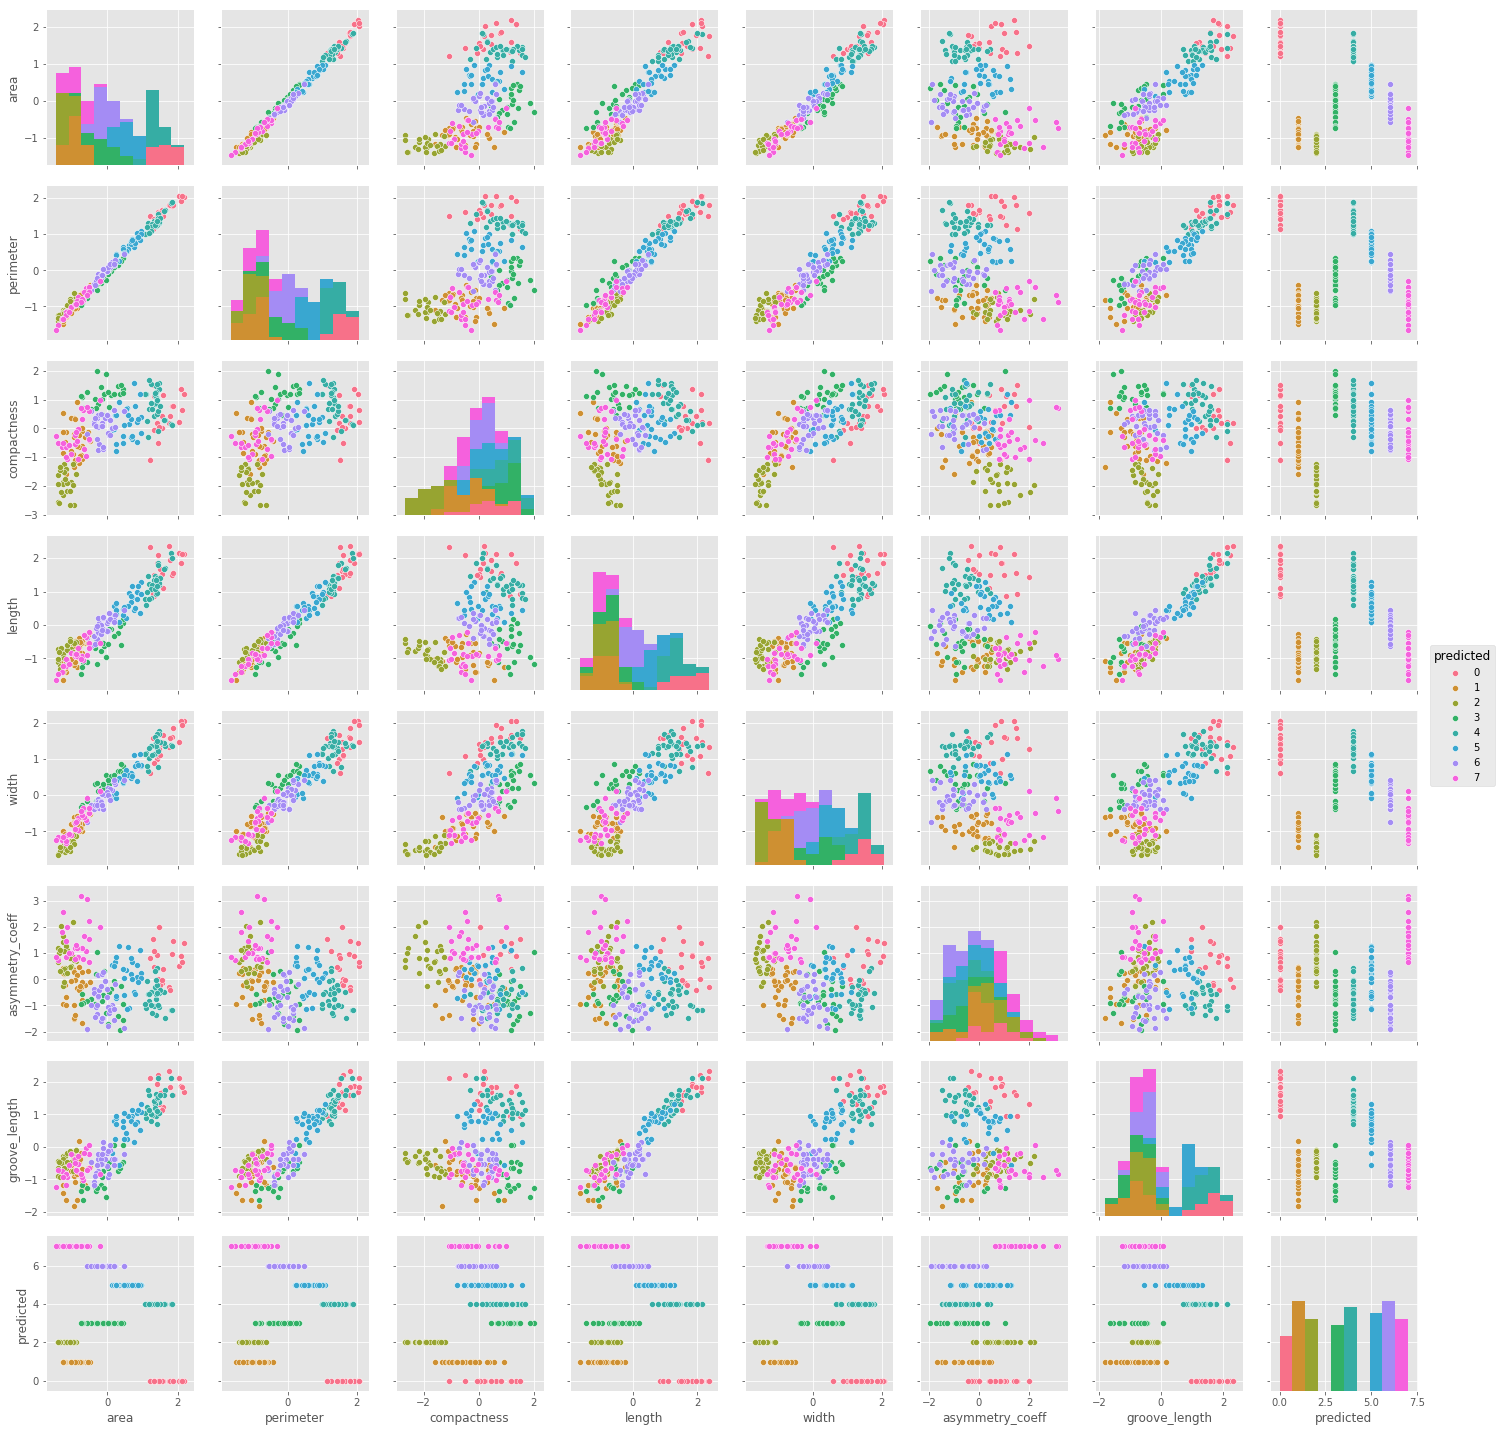

In [57]:
abc = pd.DataFrame(Xs, columns = X.columns)
abc = pd.concat([abc, pd.Series(predicted)], axis = 1)
abc = abc.rename(columns = {0:'predicted'})

sns.pairplot(abc, hue = 'predicted')

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [15]:
import random

random.randint(1,25), random.randint(1,25)

(15, 2)

In [7]:
# A:

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [9]:
# A: